# 실습 WEEK14: 인공지능의 이해


:::{admonition} 안내
:class: info  

- 실습 문제는 사전, 도전, 완전 실습 문제로 구성되어 있습니다.
- 사전 실습 문제는 수업 전에 미리 풀어보시면 도움이 됩니다.
- **<font color='blue'>도전 실습 문제는 etl>우리강좌>코딩수업>에 접속한 후, 해당 주차 문제의 소스코드를 제출하여 테스트를 통과해야 과제 점수를 받을 수 있습니다.</font>**
- **<font color='red'>제출기한은 실습수업시간부터 다음 실습수업 전날 자정까지</font>**입니다.
- 완전 실습 문제는 보너스 실습 문제로 생각하시면 됩니다.  도전 실습 문제를 다 풀어본 학생들이 추가적으로 풀어보시면 도움이 됩니다.
- 사전 실습 문제와 완전 실습 문제는 수업 시간에 별도 풀이를 하지 않습니다.
- 질문은 사전, 도전, 완전 그리고 수업과 관련된 모든 것에  대하여 교수자 or 조교 or 튜터에게 하시면 됩니다.
- **<font color='red'>가독성을 위해 입출력 데이터에서 콜론(:) 다음에는 항상 한칸 공백이 있습니다.</font>**

:::

## [도전 실습 문제]



### Problem: 챔피언 (연관분석 입문)

😄 인기 게임 *League of Gwanak* 에는 다음과 같이 일곱 가지의 챔피언들이 존재한다.

**TEEMO / YASUO / BLITZCRANK / VAYNE / ZED / RIVEN / YUUMI**

임의로 20회의 게임을 조사하여, 매 게임마다 어떤 챔피언들이 선택되었는지 league.csv에 기록하였다. *League of Gwanak* 을 즐겨 하는 원영이는 해당 데이터셋을 바탕으로 '최적의 챔피언 조합'을 찾아내고자 한다.

'최적의 챔피언 조합'이란, 서로 다른 N개의 챔피언으로 이루어진 조합들 가운데 가장 많은 게임에서 등장한 조합을 일컫는다. 이를테면 N = 3일 때 최적의 챔피언 조합을 찾는 상황을 생각하자. TEEMO - VAYNE - YUUMI가 함께 등장한 게임은 총 8회인데, 이보다 더 많이 등장한 세 챔피언의 조합은 없으므로 구하는 최적의 챔피언 조합은 TEEMO - VAYNE - YUUMI가 된다.

사용자로부터 자연수 N을 입력받아, 서로 다른 N개의 챔피언으로 이루어진 최적의 챔피언 조합을 출력하는 Python 프로그램을 작성하시오. 한 줄에 한 챔피언씩을 출력해야 하며, 챔피언의 출력 순서는 알파벳 오름차순을 따라야 한다. 만일 조건을 만족하는 최적의 챔피언 조합이 둘 이상인 경우, 그 중 하나만을 출력하여도 무방하다.

league.csv는 다음 Link에서 내려받을 수 있다.
https://raw.githubusercontent.com/fr5nti2r/FILE_SHARE/main/league.csv

(Hint) 필요한 경우, sympy가 제공하는 FiniteSet을 활용할 수 있다.
다음 Python 코드를 실행할 경우 {1, 2, 3}의 모든 부분집합들이 반환된다.
```
from sympy import FiniteSet
A = FiniteSet(1, 2, 3)
A.powerset()
```

---
Input Sample
```
3
```
Output Sample
```
TEEMO
VAYNE
YUUMI
```

### 머신러닝 기본 예제 다뤄보기

#### Problem: 선형회귀 모델
지난 수업에서는 분류모델 가운데, k-NN 알고리즘을 적용하여 붓꽃의 종류를 예측하는 모델을 만들어 보았다.

😄 선형회귀모델을 적용하여 붓꽃 꽃잎의 길이를 예측하시오.

  - 선형 회귀는 종속 변수 y와 하나 이상의 독립 변수 x와의 선형 상관관계를 모델링하는 기법이다.
  - 종속변수: 독립변수의 값에 영향을 받는 변수, 결과가 되는 칼럼
    - '온도가 30도가 되니 아이스크림 판매량이 500개를 돌파했다.'에서 아이스크림 판매량이 종속변수이다.
  - 독립변수: 종속변수에 영향을 미치는 변수, 원인이 되는 칼럼
    - '온도가 30도가 되니 아이스크림 판매량이 500개를 돌파했다.'에서 온도가 독립변수이다.


##### 데이터 확인
- 모듈 seaborn에서 제공하는 iris 데이터셋을 불러와 확인해본다.
- sns.load_dataset()으로 불러오면 pandas의 DataFrame 구조로 읽어온다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris_data=sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<div align="center"><img src="https://haesunbyun.github.io/common/images/ai7.png"></div>

- 선형 회귀는 종속 변수 y와 하나 이상의 독립 변수 x가 필요하므로 종속변수와 독립변수를 결정해보자.
- columns의 인덱스 0(임의로 선택)을 종속변수로 지정하고, 인덱스 1~3을 독립변수로 지정해보자.

In [ ]:
cols = list(iris_data.columns)
print(cols)
y_col = cols[0]
x_cols = cols[1:4]
print(x_cols, y_col)

['sepal_width', 'petal_length', 'petal_width'] sepal_length


- train_test_split()을 사용하여 트레이닝 데이터와 테스트 데이터로 나눈다.
- 옵션 test_size = 0.3로 줘서 트레이닝:테스트의 비율을 70:30으로 분리해보자.

In [ ]:
from sklearn.model_selection import train_test_split
iris_df = iris_data[cols[:4]] # 분석에 불필요한 5번째 칼럼 species 제외한 데이터
iris_train, iris_test = train_test_split(iris_df, test_size = 0.3)

- 학습용인 iris_train 데이터의 모양을 확인해보자.

In [ ]:
iris_train.shape

(105, 4)

- 검증용인 iris_test 데이터의 모양을 확인해보자.

In [ ]:
iris_test.shape

(45, 4)

##### 모델 생성
- 데이터를 분리했으니 선형회귀모델을 생성해보자.
- 선형회귀모델은 sklearn.linear_model의 LinearRegression()을 이용하여 생성할 수 있다.
- LinearRegression()에 들어갈 옵션은 default로 두고 model을 만들어보자.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

- 독립변수 X와 종속변수 y를 전달하여 학습을 시키자.

In [ ]:
model.fit(X = iris_train[x_cols], y = iris_train[y_col])

LinearRegression()

- 변수 coef_를 이용하여 기울기를 확인할 수 있다.
- 세 개의 독립변수에 대한 기울기는 [ 0.61809913,  0.72706308, -0.59775925]와 같다.

In [ ]:
model.coef_        # 기울기

array([ 0.61809913,  0.72706308, -0.59775925])

- 변수 intercept_를 이용하여 절편을 확인할 수 있다.


In [ ]:
model.intercept_  # 절편

1.9124812422500796

- 기울기를 a, 절편을 b로 두었을 때 회귀방정식은 aX+b이다.

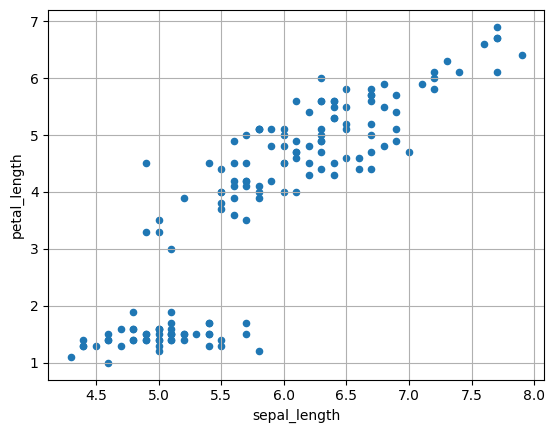

In [ ]:
#plt.plot(x_cols, y_col)

iris_data.plot(kind ="scatter", x ='sepal_length', y ='petal_length')
plt.grid()
plt.show()

- 만든 회귀모델에 테스트데이타를 주고 sepal_length를 예측해보도록 하자.

In [ ]:
y_pred = model.predict(X=iris_test[x_cols])
y_pred

array([7.15575091, 4.92317178, 5.4789581 , 6.88329373, 6.67462264,
       6.45739138, 5.60320004, 6.40458953, 6.19837992, 6.77799208,
       4.85286999, 6.17838109, 5.74160676, 6.0337233 , 6.30368157,
       4.80885552, 5.18464472, 6.43962681, 6.46178507, 6.40023325,
       5.07832194, 6.70765288, 6.84609702, 5.21528831, 6.20277361,
       4.49484536, 6.73394019, 5.00222353, 6.78893889, 5.14063025,
       6.56708672, 5.51759517, 4.93192174, 5.07688159, 5.46119353,
       6.02277649, 5.73065995, 4.87915731, 6.09936675, 4.71885696,
       5.59005638, 6.4311789 , 4.03561072, 7.30946072, 7.99024547])

In [ ]:
len(y_pred) # 45

45

- 오리지널 데이터와 정답을 줘서 모델의 평가점수를 확인해보자.

In [ ]:
score = model.score(iris_test[x_cols], iris_test[y_col])

In [ ]:
score

0.858607659266148

#### Problem: 군집(clustering) 모델
😄 군집모델 가운데 k-means 알고리즘을 적용하여 붓꽃의 품종을 예측하시오.
- 군집은 비지도 학습에 포함된다.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(iris_df) #학습시킴

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
kmeans.labels_

In [ ]:
len(kmeans.labels_)

150

In [ ]:
iris_df['target'] = iris_data.species
iris_df['cluster'] = kmeans.labels_

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target      cluster
setosa      1          50
versicolor  0          48
            2           2
virginica   0          14
            2          36
Name: sepal_length, dtype: int64


## [참고 컴퓨팅 응용 강의계획서]



### 컴퓨팅 응용: 기계학습 개념 및 실습 강의계획서

```
1주차 기계학습 소개 및 자료 입출력
2주차 회귀모델
3주차 분류모델과 평가방법
4주차 고급 분류모델: SVM/Decision Tree/Random Forest
5주차 비지도 기계학습: PCA와 FactorMap
6주차 군집모델과 평가방법: Hierarchical clustering/k-Mean Clustering
7주차 중간고사
8주차 분류모델의 고도화: 파라미터 튜닝/교차검증
9주차 군집모델의 활용: 군집 모델의 실제 활용사례
10주차 추천 시스템
11주차 그래프와 네트워크 분석
12주차 연관규칙 (Association Rule)
13주차 기말고사
14주차 기계학습 프로젝트 해커톤
15주차 기계학습 프로젝트 해커톤
```

### 컴퓨팅 응용: 자연어처리의 기초 강의계획서


1 week: Introduction to Natural Language Processing and Computational Linguistics

2 Week: Text Preprocessing
- Tokenization, Normalization, Stemming, Lemmatization
- Text Preprocessing Practice
-Introduction to Pytorch
- Pytorch Practice: Tensors, Datasets and Dataset Loaders, Transforms, Build Model, Automatic Differentiation, Optimization Loop, Save, Load and Use Model

3 week: Text Preprocessing
- Numericalization, Integer encoding, Pdding, One-hot encoding
- Pytorch Practice: Tensors, Datasets and Dataset Loaders, Transforms, Build Model, Automatic Differentiation, Optimization Loop, Save, Load and Use Model

4 week: Word Split
- Tokenizer: BPE, Sentence Piece, Word Piece, Unigram
- Pytorch Practice: Tensors, Datasets and Dataset Loaders, Transforms, Build Model, Automatic Differentiation, Optimization Loop, Save, Load and Use Model

5 week: Word Embdding
- Word Embedding: Word2vec, Glove, FastText
- Practice Korean and English Word Embedding

6 week: Word Embedding
- Word Embedding: Word2vec, Glove, FastText
- Practice Korean and English Word Embedding

7 week: RNN-based Encoder-Decoder
- Sequence to Sequence Model
- Machine Translation Practice using sequence to sequence Model

8 Week: Attention
- Various Attention Models and Scoring

9 week: Transformer
- Transformer, Self-Attention
- Machine Translation Practice Using Transformer Architecture

10 week: Transformer-based Pretrained Models
- BERT(BERT(Bidirectional Encoder Representations from Transformer), GPT (Generalized Pre Training)

11 Week: Huggingface Transformer
- How to use Huggingface Transformer
- Hugging face Transformer Practice: Sequence Classification, Extractive Question Answering, Named Entity Recognition, Summarization, Translation

12 Week: Classification Through Transformer
- Classification: Korean News Article and Movie Review Classification Using Korean Pre-trained Models

13 Week: Summarization Through Transformer
- Summarization: Amazon Review Summarization and Korean Text Summarization

14: Week: Question Answering and Chatbot Through Transformer
- QA and Chabot: QA using Facebook bAbI dataset/ Korean bAbI dataset QA and Chabot using various datasets

15: Final Project Presentations

### 컴퓨팅 응용: 데이터사이언스의 기초 강의계획서

```
1주차 강의소개
2주차 파이썬 언어소개
3주차 자료요약과 시각화
4주차 파이썬 함수 및 자료 정렬과 변환
5주차 자료의 그룹화 및 결합
6주차 표본과 불확실성
7주차 분포의 이해
8주차 중간고사
9주차 집단의 비교 및 의사결정
10주차 회귀모형의 기초
11주차 분류모형의 기초
12주차 분류모형의 성능개선
13주차 빅데이터 처리
14주차 Case Study(빅데이터 수집 및 분류모형구축)
15주차 기말고사
```

## [스스로 따라해보는 이론내용]



### 음성인식(Speech Recognition) 활용해보기
- 음성인식이란 사람이 말하는 음성 언어를 컴퓨터가 해석해 그 내용을 문자 데이터로 전환하는 처리를 의미한다.
- STT(Speech-to-Text)라고도 하며, 현재는 사람과 기계간의 대화를 가능하게 하는 자연어처리 기술까지도 포함하기도 한다.
- 적용사례로는
  - 해외: 아마존의 에코, 구글의 구글 홈, 애플의 홈포드, MS의 인보크 등
  - 국내: SK 텔레콤의 누구, KT의 기가지니, 카카오의 카카오 미니, 네이버의 웨이브, LG전자의 씽큐허브 등이 있다.
  - 특정 단어로 스피커의 기능을 활성화한 후, 스피커의 기능뿐만 아니라 뉴스, 환율, 날씨 등의 정보를 얻을 수 있으며, 네비게이션이나 TV, 냉장고 등 다른 기기들과 연동이 가능하다.

- 음성인식 시스템의 기본 구조
<div align="center"><img src="https://haesunbyun.github.io/common/images/ai9.png"></div>

  - 음향모델: 음성의 신호적인 특성을 모델링하여 비교
  - 언어모델: 단어나 음절 등의 언어적인 순서 관계를 모델링

#### 음성->텍스트변환(SpeechRecognition)

- 음성을 인식하는 라이브러리 SpeechRecognition을 설치하자.

In [ ]:
pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 57.1 MB/s eta 0:00:00


- 음성을 인식하는 모듈 이름은 speech_recognition으로 별칭 sr로 import 시킨다.
- sr에 Recognizer()로 음성 인식 객체를 생성한다.

In [ ]:
import speech_recognition as sr
r = sr.Recognizer()

- 음성파일인 'hello_hs.wav'을 연다.
- 파일을 open()하면 반드시 close()해 줘야 하는데, with로 파일을 열면 with를 벗어날 때 자동으로 파일이 close 되어 별도로 close()를 해줄 필요가 없다.
```
with open(파일 경로, 모드) as 파일 객체:
    처리 코드
```
- 음성인식 객체인 r의 record()를 통해 오디오 데이타를 얻는다.


In [ ]:
hello = sr.AudioFile('hello_hs.wav')

with hello as source:
    audio = r.record(source)

- recognize_google()은 google의 web speech API이다. 기본 API키가 있어서 별도의 API인증키없이 사용 가능하다.
- recognize_google()를 통해 인식된 음성 결과를 텍스트로 반환한다. 옵션으로 언어를 설정해준다.

In [ ]:
r.recognize_google(audio, language='ko-KR')

- record() 옵션으로 duration을 주면 해당 초 만큼만 끊어서 텍스트로 읽어온다.

In [ ]:
harvard = sr.AudioFile('harvard.wav')
with harvard as source:
    audio1 = r.record(source, duration=4)
    audio2 = r.record(source, duration=4)

In [ ]:
r.recognize_google(audio1)

In [ ]:
r.recognize_google(audio2)

'it takes heat to bring out the odor a cold dip'

- record() 옵션으로 offset을 주면 해당 초 후부터 읽어온다.

In [ ]:
with harvard as source:
    audio = r.record(source, offset=4, duration=3)

In [ ]:
r.recognize_google(audio)

'it takes heat to bring out the odor'

#### 텍스트->음성변환(gtts)
- gtts는 Google Text-to-Speech로 구글에서 만든 모듈 음성변환 모듈이다.

In [ ]:
pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gtts import gTTS

- gtts모듈의 gTTS()함수는 텍스트를 음성으로 변환한다.
- 이때 옵션 lang에 언어를 설정해야 하며, 옵션 slow로 속도를 조정할 수 있다.
- 지원하는 주요 언어는 다음과 같다.

|   언어        |      값      |
|:-------------:|:-----------:|
|Korean|ko|
|English|en|
|English (UK)|en-uk|
|English(US)|en-us|
|Chinese|zh-cn|
|Japanese|ja|
|German|de|
|French|fr|


In [ ]:
tts = gTTS(text='안녕하세요. 학기가 끝나가네요.', lang='ko', slow=False)
tts.save('hello_kor.mp3')

- IPython.display는 파이썬 작업환경에 나타내는 모듈이다.
- 음성으로 변환한 파일을 파이썬을 통해 들어보자.

In [ ]:
import IPython.display as ipd
filename = 'hello_kor.mp3'
ipd.Audio(filename)

In [ ]:
tts = gTTS(text='Believe you can, then you will!', lang='en')
tts.save('believe_en_slow.mp3')
filename1 = 'believe_en_slow.mp3'
ipd.Audio(filename1)

### Computer Vision(opencv) 활용해보기
- computer vision은 기계의 시각에 해당하는 부분을 연구하는 컴퓨터 과학의 연구분야이다.
- opencv는 이미지처리/영상처리를 위한 오픈소스 라이브러리이다. 영상 관련 라이브러리로서 사실상 표준이라고 볼 수 있다.
  - 사진이나 동영상 자료에 수학적 연산을 수행하여 원하는 결과를 얻는 과정
    - 화질개선: 밝기를 조절하는 기능
    - 영상복원: 흠(noise)이 많은 영상을 복원하는 기능
    - 영상분할: 원하는 부분을 선택하고 오려내거나 나누는 기능
    - 영상합성: 여러 영상을 결합하여 새로운 영상으로 만드는 기능
    - 객체 검출 (Object detection)
    - 객체 인식 (Object Recognition)
    - 객체 추적 (Object Tracking)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

import cv2
print(cv2.__version__) #computer vision 버젼 확인

4.7.0


#### 이미지 처리(image processing)
- 여기에서는 이미지를 불러와서 색상을 변경해보자.

- cv2.imread()는 이미지를 불러오는 함수이다. 이미지를 불러와서 타입과 값을 출력해보면 numpy의 배열로 불러오는 것을 확인할 수 있다.
- cv2.IMREAD_COLOR는 기본 칼라인 BGR로 읽으라는 옵션이다.

In [ ]:
img = cv2.imread('apple.jpg', cv2.IMREAD_COLOR)
print('type(img): ', type(img))
print(img)

- 읽어온 이미지를 matplotlib으로 출력해보면 파란색 사과가 출력된다.
- 색상을 표현하는 방법으로 RGB(Red, Green, Blue) 방식이 있다. 빨강, 초록, 파랑 세 가지 색의 빛을 섞어서 원하는 색을 만드는 방식이다. 각 색상은 0~255 사이의 값으로 표시하고 값이 커질수록 해당 색상의 빛이 밝아진다. 예를 들어, (255, 255, 255) 일 때는 흰색이고, (0, 0, 0) 일 때는 검은색이다.
- 그러나 opencv에서는 순서를 바꿔 BGR(Blue, Green, Red)을 기본값으로 사용한다. 빨간색은 RGB 값으로 (255, 0, 0)이지만 BGR로 읽으면 파란사과가 출력된다.

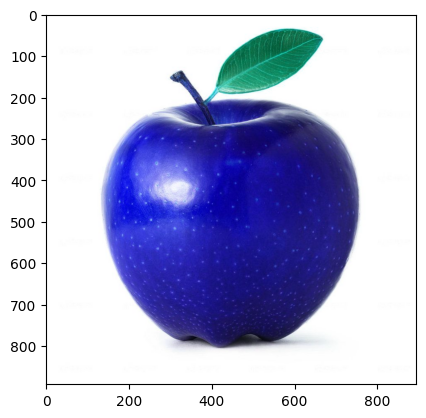

In [ ]:
plt.imshow(img)
plt.show()

- 읽어올때부터 색깔을 변경하여 읽어올 수도 있다. cv2.COLOR_BGR2RGB은 BGR을 RGB로 변환하여 읽으라는 것이다.
- 먹음직스러운 빨간 사과가 출력되었다.

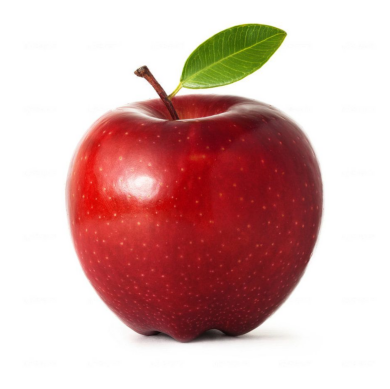

In [ ]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imgRGB)
plt.show()

- 이번에는 opencv를 통해 어두운 사진을 밝게 보정해보자.


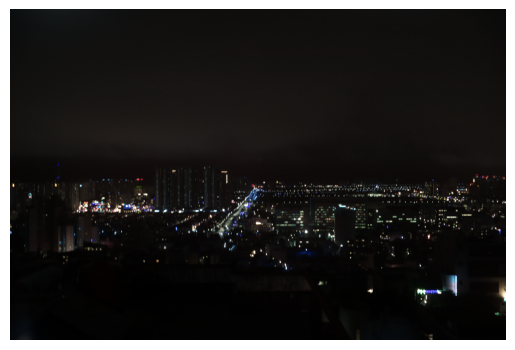

In [ ]:
img = cv2.imread('night.jpg', cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(img)
plt.show()

- 이미지의 색 값을 히스토그램으로 나타내보자.
- numpy의 ravel()함수는 1차원 배열로 변환시켜주는 함수이다.
- 이미지는 3차원 배열로 저장되어 있으므로 이를 1차원 배열로 변환한 후, 히스토그램을 그린다.
- 색이 얼마나 한쪽으로 쏠려있는지 확인할 수 있다.
- y축 좌표위의 1e7은 1*10^7이다.

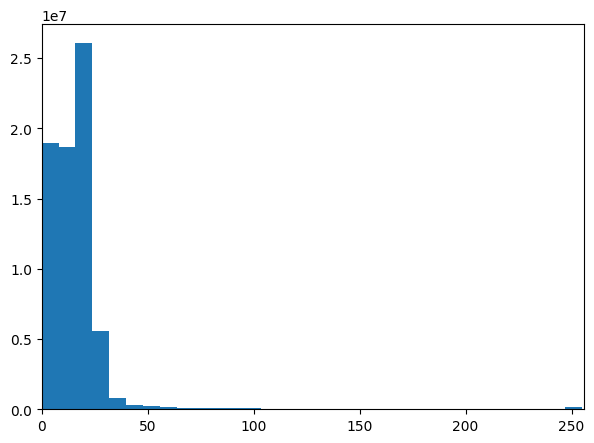

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(img.ravel(), bins=32)
plt.xlim([0,256])
plt.show()

- 한쪽으로 쏠려있는 이미지를 평평하게 펴주자.
- split() 함수를 이용하여 컬러별로 분리한후 b, g, r로 저장한다.
- equalizeHist()를 통해 b,g,r의 색을 평평하게 편다.
- 그런 후에 merge()함수를 통해 다시 합친다.

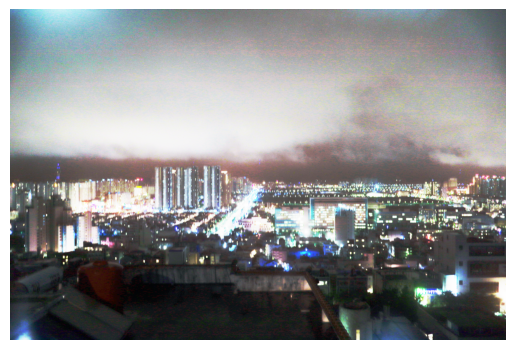

In [ ]:
b, g, r = cv2.split(img)
b1 = cv2.equalizeHist(b)
g1 = cv2.equalizeHist(g)
r1 = cv2.equalizeHist(r)
img_eq = cv2.merge((b1,g1,r1)) #변형된 각각 채널을 합침

plt.axis('off')
plt.imshow(img_eq)
plt.show()
#cv2_imshow(img_eq)


- 평평하게 펴진 히스토그램을 확인해보자.

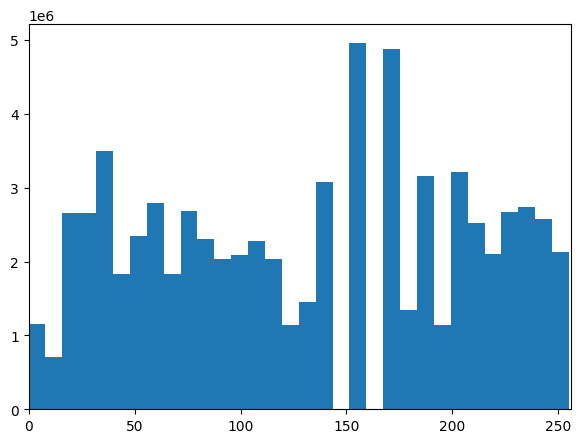

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(img_eq.ravel(), bins=32)
plt.xlim([0,256])
plt.show()

#### 동영상에서 보행자 검출

- cv2.HOGDescriptor()에서 HOG는 Histogram of Gradient로 HOGDescriptor()는 객체를 검출하기 위해 만들어진 함수이다.
- setSVMDetector()에서 SVM은 Supprt Vector Machine의 약자로, 여백을 최대화하여 초평면을 찾는 지도학습 알고리즘이다.
- setSVMDetector()는 SVM알고리즘으로 이동하는 물체를 추적하기 위해 미리 학습된 모델이다.
- setSVMDetector() 전달인자로 HOGDescriptor_getDefaultPeopleDetector()를 인자로 넣어 사람을 검출하도록 한다.

In [ ]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

- cv2모듈의 VideoCapture()로 동영상을 불러온다.
- 반복문을 통해 동영상에서 프레임을 읽어온다. 프레임이 제대로 읽혔다면 즉 ret==True이라면, 그 프레임에서 보행자를 검출한다.
- 검출결과를 화면에 표시하기 위해 검출좌표를 사각형으로 표시한다.

In [ ]:
from IPython.display import clear_output

cap = cv2.VideoCapture('walking.avi')

while True:
    ret, frame = cap.read()
    if not ret:
        break
    detected, _ = hog.detectMultiScale(frame) # 매 프레임마다 보행자 검출

    # 검출 결과 화면 표시
    # 사각형 시작좌표 x,y, 종료좌표 w,h, 사각형색깔(127,0,0) , 사각형 두께 2
    for (x, y, w, h) in detected:
        cv2.rectangle(frame, (x, y, w, h), (127, 0, 0), 2)

    clear_output(wait=True)
    cv2_imshow(frame)
    # if cv2.waitKey(10) == 27:
    #     break